## 1. What's the "Calculus of Variations"?

Imagine you're at the top of a hill and want to get to a point at the bottom. You could take many different paths. Some are short and steep, others are long and gentle. The "Calculus of Variations" is like a GPS for finding the *best* path. But "best" could mean a lot of things: the fastest path, the shortest path, or the path of least energy.

In math terms, we're not just finding the minimum of a function (like finding the bottom of a valley). We're trying to find a *whole function* (the path itself) that minimizes some quantity. This quantity is called a **functional**.

A functional takes a function and spits out a number. For us, the functional is usually an integral that looks like this:

$$ J[y] = \int_{x_1}^{x_2} F(x, y(x), y'(x)) \, dx $$

Let's break that down:
- $y(x)$ is the path we're trying to find.
- $y'(x)$ is the slope of that path at any point.
- $F(...)$ is a formula that defines what we're trying to minimize. It could be time, distance, or something more abstract like "action."
- The integral sign $\int$ just means we're summing up the value of $F$ over the entire path, from our start point $x_1$ to our end point $x_2$.

Our goal is to find the one magical function $y(x)$ that makes the number $J$ as small (or as large) as possible.

## 2. The Euler-Lagrange Equation: The Magic Formula

So how do we find that best path? We use the **Euler-Lagrange equation**. Think of it as the secret for solving our "best path" problem.

After some clever math (which I'm not gonna write out in latex because that would take too long), we arrive at this equation:

$$ \frac{\partial F}{\partial y} - \frac{d}{dx} \left( \frac{\partial F}{\partial y'} \right) = 0 $$

It looks absolutely terrible, but it's just a differential equation. As a result it follows the same idea as other differential equations you've seen before:
1.  Figure out what your $F(x, y, y')$ function is.
2.  Plug it into the Euler-Lagrange equation.
3.  Solve the resulting differential equation for $y(x)$.

The solution, $y(x)$, is the path that extremizes (minimizes or maximizes) your functional! It's the answer to "what's the best path?"

### What if I Have More Than One Path to Worry About?

Sometimes, a system needs more than one function to describe it. For example, the position of a particle in 3D space needs three functions: $y_1(x)$, $y_2(x)$, and $y_3(x)$.

It really doesn't matter.The idea is the same. Our functional just depends on all these functions and their derivatives:
$$ J[y_1, \dots, y_n] = \int_{x_1}^{x_2} F(x, y_1, \dots, y_n, y'_1, \dots, y'_n) \, dx $$

And we get a separate Euler-Lagrange equation for *each* function:
$$ \frac{\partial F}{\partial y_i} - \frac{d}{dx} \left( \frac{\partial F}{\partial y'_i} \right) = 0 \quad \text{for each } i = 1, 2, \dots, n $$

This gives us a set of equations that we solve together. This is super important for mechanics, where a system might have many moving parts.

### The Beltrami Identity: A Handy Shortcut

Sometimes, the formula $F$ we're working with doesn't explicitly depend on the variable $x$. For example, maybe $F$ only cares about the path $y$ and its slope $y'$, but not *where* along the x-axis you are.

When this happens ($\frac{\partial F}{\partial x} = 0$), we can use a simplified version of the Euler-Lagrange equation called the **Beltrami identity**:

$$ F - y' \frac{\partial F}{\partial y'} = \text{Constant} $$

This is awesome because it's a "first integral" of the motion. It tells us that a certain combination of quantities stays constant throughout the entire path. This constant value is often something physically meaningful, like the total energy of the system!

In physics, if our "recipe" (the Lagrangian) doesn't explicitly depend on time, then the Beltrami identity tells us that the total energy of the system is conserved. This is a huge deal and a super useful shortcut for solving problems. It's our first glimpse of a deep idea called **Noether's Theorem**, which connects symmetries (like time not mattering) to conserved quantities (like energy).

## 3.  Lagrangian Mechanics, an example

Okay, let's connect all this to the real world. In physics, we have a principle called the **Principle of Least Action**. It says that nature is "lazy." When an object moves from point A to point B, it will follow the path that minimizes a quantity called **action**.

Our functional is now the action, $S$, and our "recipe" function, $F$, is now called the **Lagrangian**, $L$.

The Lagrangian is simple. For most systems, it's just the **kinetic energy ($T$) minus the potential energy ($V$)**:

$$ L = T - V $$

And the action is the integral of the Lagrangian over time:

$$ S = \int_{t_1}^{t_2} L(q(t), \dot{q}(t), t) \, dt $$

- $q(t)$ represents the "generalized coordinates" of our system. This is just a fancy way of saying "the variables that describe the state of the system." For a pendulum, it's the angle $\theta$. For a ball, it could be its x, y, z position.
- $\dot{q}(t)$ is the time derivative of those coordinates (the generalized velocities).

To find the path the object *actually* takes, we just plug our Lagrangian $L$ into the Euler-Lagrange equation (with $x$ replaced by $t$, and $y$ replaced by $q$):

$$ \frac{\partial L}{\partial q_i} - \frac{d}{dt} \left( \frac{\partial L}{\partial \dot{q}_i} \right) = 0 $$

Solving this equation for each coordinate $q_i$ gives us the **equations of motion** for the system. It tells us exactly how the system will behave over time. It's a completely different, and often much easier, way to do mechanics!

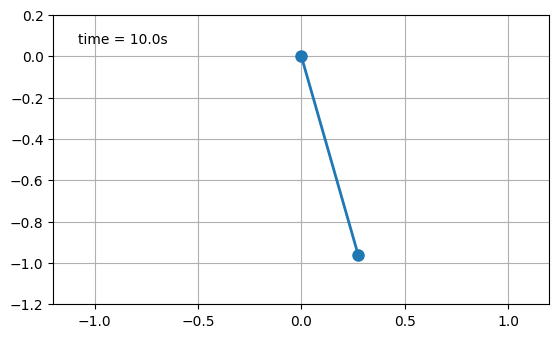

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
g = 9.81  # acceleration due to gravity (m/s^2)
l = 1.0   # length of the pendulum (m)
m = 1.0   # mass of the pendulum (kg)

# Initial conditions: [theta, omega]
# Starting at a 90-degree angle with no initial velocity
initial_state = [np.pi / 2, 0]

# Time points
t = np.linspace(0, 10, 250)

# The differential equation for the pendulum
def pendulum_eq(state, t, l, g):
    theta, omega = state
    dtheta_dt = omega
    domega_dt = -(g / l) * np.sin(theta)
    return [dtheta_dt, domega_dt]

# Solve the ODE
solution = odeint(pendulum_eq, initial_state, t, args=(l, g))
theta_solution = solution[:, 0]
omega_solution = solution[:, 1]

# Convert polar coordinates to Cartesian coordinates for plotting
x = l * np.sin(theta_solution)
y = -l * np.cos(theta_solution)

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-l * 1.2, l * 1.2)
ax.set_ylim(-l * 1.2, 0.2)
ax.set_aspect('equal')
ax.grid()

# The pendulum rod and bob
line, = ax.plot([], [], 'o-', lw=2, markersize=8)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# Animation initialization function
def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

# Animation update function
def animate(i):
    thisx = [0, x[i]]
    thisy = [0, y[i]]
    line.set_data(thisx, thisy)
    time_text.set_text(time_template % t[i])
    return line, time_text

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

# To display the animation in the notebook, we need to convert it to a format that can be embedded.
from IPython.display import HTML
HTML(ani.to_jshtml())

## 5. So, Why is this Lagrangian Thing Better than Old-School Newtonian Physics?

You might be thinking, "I learned $\vec{F}=m\vec{a}$ in school, why do I need this new stuff?" Great question! While both methods get you the right answer, the Lagrangian approach is like having a Swiss Army knife for physics. Here are some reasons why it's often better:

### 1. **It Hates Dealing with "Constraint Forces" and thats much less work for you**

- **Newton's Way:** Imagine a pendulum. You have to worry about gravity, but also the tension in the string. This tension is a "constraint force" – it's there to keep the pendulum's length constant. You have to put it in your equations, which is a pain.
- **Lagrangian Way:** You just say, "Hey, the only thing that can change is the angle, $\theta$." By choosing the right coordinate, the tension force just... disappears from the problem! The math automatically handles it. It's way cleaner.

### 2. **Literally Choose Your Own Coordinates, If it describes your problem, it works**

- **Newton's Way:** You're pretty much stuck with Cartesian coordinates ($x, y, z$). If your problem is better described by angles or distances (like our pendulum), converting everything is a nightmare of sines and cosines.
- **Lagrangian Way:** Use whatever coordinates make the most sense! Angles, distances, a mix of both... it doesn't care. The Euler-Lagrange equation looks the same no matter what coordinates you pick. This is called **invariance**, and it's incredibly powerful.

### 3. **Scalars are Your Friend, Vectors are... Complicated.**

- **Newton's Way:** $\vec{F}=m\vec{a}$ is all about **vectors**. Vectors have magnitude *and* direction. That means you're constantly breaking things into x, y, and z components. It's messy.
- **Lagrangian Way:** The Lagrangian ($L=T-V$) is a **scalar**. It's just a number! Energy doesn't have a direction. It's so much easier to just write down the kinetic and potential energies (which are scalars) than it is to figure out all the vector forces.

### 4. **It Has a Built-in Cheat Code for Finding Conserved Stuff**

- **Lagrangian Way:** The formalism has a deep connection to conservation laws through **Noether's Theorem**.
    - If your Lagrangian doesn't care about a certain position coordinate (say, the system is the same if you shift it left or right), then the momentum in that direction is **conserved**.
    - If your Lagrangian doesn't explicitly depend on time, then the total **energy** of the system is **conserved**.
- This gives you a systematic way to find "cheat codes" for your problem—the conserved quantities that make solving it way easier.

### Quick Example: Bead on a Rotating Hoop

Think of a bead on a wire hoop that's spinning around.
- **Newton's Way:** You'd have to deal with gravity, the normal force from the hoop pushing on the bead (which is constantly changing direction!), and weird "fictitious" forces like the centrifugal and Coriolis forces. It's a total headache.
- **Lagrangian Way:**
    1.  Pick one coordinate: the angle $\theta$ of the bead on the hoop.
    2.  Write down its kinetic energy, $T$ (it has a part from sliding and a part from the hoop spinning).
    3.  Write down its potential energy, $V$ (just from gravity).
    4.  Build the Lagrangian: $L = T - V$.
    5.  Plug $L$ into the Euler-Lagrange equation. Done.

You completely sidestep the messy, complicated forces. You just focus on the energy, and the magic of the Lagrangian formalism does the heavy lifting.

## 6. Noether's Theorem: The Universe's Deepest Secret

We've mentioned this a few times, but let's give it its own spotlight. **Noether's Theorem** is a  beautiful yet seemingly obvious idea discovered by the brilliant mathematician Emmy Noether.

In simple terms, the theorem says:

> **For every continuous symmetry in the laws of physics, there must be a corresponding conservation law.**

It's a cosmic "if-then" statement that connects two fundamental concepts: symmetry and conservation.

### What's a "Symmetry"?

A symmetry means that if you change something about your experiment, the results don't change. The laws of physics are the same.

*   **Spatial Translation Symmetry:** Imagine you're doing an experiment in your lab. If you pick up the whole lab and move it two miles to the east, will the laws of physics change? Nope. Gravity is the same, electromagnetism is the same. The outcome of your experiment will be identical. The laws of physics are symmetric with respect to *location*.

*   **Time Translation Symmetry:** What if you do the same experiment tomorrow instead of today? As long as the conditions are the same, the result will be the same. The laws of physics don't care *when* you do the experiment. They are symmetric with respect to *time*.

*   **Rotational Symmetry:** If you rotate your experiment to face north instead of west, the laws of physics still hold. The outcome will be the same. The laws are symmetric with respect to *orientation*.

### The "If-Then" Payoff

Noether's theorem connects each of these symmetries to a quantity that must be **conserved** (i.e., the total amount of it can't change).

*   **If** the laws of physics are symmetric with respect to **location**...
    *   **Then** linear **momentum** is conserved.
    *   This is why the total momentum of a system before and after a collision is the same, as long as no external forces are acting on it.

*   **If** the laws of physics are symmetric with respect to **time**...
    *   **Then** **energy** is conserved.
    *   This is the big one! It's the reason the total energy of an isolated system is always constant. We saw this with the Beltrami Identity: if the Lagrangian doesn't explicitly depend on time, energy is conserved. If it is changing with time, energy might not be conserved then the hamiltonian can change with time.

*   **If** the laws of physics are symmetric with respect to **rotation**...
    *   **Then** angular **momentum** is conserved.
    *   This is why a spinning ice skater pulls in her arms to spin faster, and why a planet stays in its orbital plane.

The Lagrangian formalism makes this connection clear-hopefully. If the Lagrangian doesn't change when you change a coordinate (i.e., it has a symmetry), you automatically get a conservation law. It's one of the most important ideas in science, linking the abstract beauty of symmetry directly to the laws of the universe.